# OnlineEdu Academic Affairs Analysis - Emily Torres

Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Analysis #1: Event Attendance Data Analysis

### Gathering Attendance of Events Based on Age Group Using Demographic Data and Event Attendance Data

Code Breakdown
1) Load and merge data
2) Clean data
3) Handle missing data values
4) Categorize age groups
5) Identify attendance columns
6) Convert attendance to binary values
7) Melt data
8) Aggregate data
9) Display results

In [2]:
# Step 1
demo_data = pd.read_csv('Demographic_Data.csv')
demo_data = pd.DataFrame(demo_data)

event_data = pd.read_csv('Event_Attendance_Data.csv')
event_data = pd.DataFrame(event_data)

demo_event_data = pd.merge(demo_data, event_data, on='user_id', how='inner')

# Step 2
demo_event_data.drop(columns=['term_number', 'hear_about_onlineedu', 'gender', 'race',
       'hispanic', 'high_school_grad', 'ged_received', 'first_gen_college?',
       'past_college_enrollment', 'zipcode', 'city', 'state', 'veteran_status',
       'registration_status', 'Lifetime Credits Completed',
       'Lifetime Credits Attempted', 'Lifetime GPA'], inplace=True)

# Step 3
demo_event_data = demo_event_data.fillna('')

# Step 4
age_bins = [18, 24, 34, 50, float('inf')]
age_labels = ['18-24', '25-34', '35-50', '50+']

demo_event_data['age_group'] = pd.cut(demo_event_data['age'], bins=age_bins, labels=age_labels, right=False)

# Step 5
attendance_columns = [col for col in demo_event_data.columns if '__' in col]

# Step 6
demo_event_data[attendance_columns] = demo_event_data[attendance_columns].applymap(lambda x: 1 if x == 'Present' else 0)

# Step 7
attendance_by_event_age = demo_event_data.melt(id_vars=['age_group'], value_vars=attendance_columns, 
                                               var_name='Event', value_name='Attendance')

# Step 8
attendance_summary = attendance_by_event_age.groupby(['Event', 'age_group'])['Attendance'].sum().unstack(fill_value=0)

# Step 9
attendance_summary

/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/3035440272.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  demo_event_data[attendance_columns] = demo_event_data[attendance_columns].applymap(lambda x: 1 if x == 'Present' else 0)
/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/3035440272.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_summary = attendance_by_event_age.groupby(['Event', 'age_group'])['Attendance'].sum().unstack(fill_value=0)


age_group,18-24,25-34,35-50,50+
Event,,,,
2024-10-10__OPTIONAL Office Hours with Director of Student Affairs,12,26,19,3
2024-10-11__OnlineEdu Debate Club,3,10,1,0
2024-10-13__OnlineEdu Debate Club,3,7,2,0
2024-10-15__Transfer Tuesday with SNHU,17,70,19,4
2024-10-16__Caffeinated Chasers Between the Enchanted Covers Book Club,3,5,0,0
2024-10-17__OPTIONAL Office Hours with Director of Student Affairs,8,14,6,2
2024-10-18__OnlineEdu Debate Club,3,6,1,0
2024-10-22__Transfer Tuesday with NLU,12,29,14,3
2024-10-23__Caffeinated Chasers Between the Enchanted Covers Book Club,1,4,0,0


### Finding & Graphing The Total Number of Present Event Attendees for Each Age Group

Code Breakdown:
1) Define Age Bins and Labels
2) Assign age groups to the data
3) Counting age group frequencies
4) Convert counts to a separate dataframe
5) Display results

In [3]:
# Step 1
age_bins = [18, 24, 34, 50, float('inf')]
age_labels = ['18-24', '25-34', '35-50', '50+']

# Step 2
demo_event_data['age_group'] = pd.cut(demo_event_data['age'], bins=age_bins, labels=age_labels, right=False)
demo_data['age_group'] = pd.cut(demo_data['age'], bins=age_bins, labels=age_labels, right=False)

# Step 3
age_group_counts = demo_data['age_group'].value_counts()

# Step 4
age_group_counts_df = pd.DataFrame(age_group_counts)

# Step 5
age_group_counts_df

,count
age_group,
25-34,954
18-24,440
35-50,262
50+,57


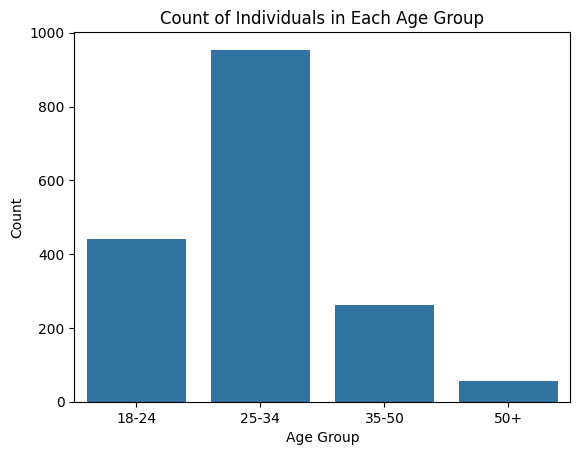

In [4]:
# Step 1
sns.barplot(x='age_group', y='count', data=age_group_counts_df)

# Step 2
plt.title('Count of Individuals in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Step 3
plt.show()

### Create an Event Category column for Attendance Summary

Code Breakdown:
1) Creating the event_categories dictionary
2) Converting the dictionary to a dataframe
3) Merging the event categories with the attendance summary
4) Display results

In [5]:
# Step 1
event_categories = {
    '2024-10-10__OPTIONAL Office Hours with Damon Director of Student Affairs': 'Academic',
    '2024-10-11__OnlineEdu Debate Club': 'Social',
    '2024-10-13__OnlineEdu Debate Club': 'Social',
    '2024-10-15__Transfer Tuesday with SNHU': 'Academic',
    '2024-10-16__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-10-17__OPTIONAL Office Hours with Damon Director of Student Affairs': 'Academic',
    '2024-10-18__OnlineEdu Debate Club': 'Social',
    '2024-10-22__Transfer Tuesday with NLU': 'Academic',
    '2024-10-23__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-10-24__Student Council Interest Meeting': 'Social',
    '2024-10-30__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-10-30__Career Cafe w Drew Dernavich': 'Career',
    '2024-10-31__OPTIONAL Office Hours with Damon Director of Student Affairs': 'Academic',
    '2024-11-01__OnlineEdu Debate Club': 'Social',
    '2024-11-01__Parent Support Club': 'Social',
    '2024-11-06__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-11-06__Career Workshop w Darren Virassammy': 'Career',
    '2024-11-08__Parent Support Club': 'Social',
    '2024-11-12__Transfer Tuesday with BUTLER UNIVERSITY': 'Academic',
    '2024-11-13__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-11-14__OPTIONAL Office Hours with Damon Director of Student Affairs': 'Academic',
    '2024-11-15__Parent Support Club': 'Social',
    '2024-11-17__OnlineEdu Debate Club': 'Social',
    '2024-11-19__Transfer Tuesday with UMGC': 'Academic',
    '2024-11-22__OnlineEdu Debate Club': 'Social',
    '2024-11-25__Welcome to OnlineEdu': 'Social',
    '2024-12-03__TRANSFER TUESDAY WITH TSU': 'Academic',
    '2024-12-04__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-12-04__Success at OnlineEdu  Coaches': 'Career',
    '2024-12-05__OPTIONAL Office Hours with Damon Director of Student Affairs': 'Academic',
    '2024-12-08__OnlineEdu Debate Club': 'Social',
    '2024-12-10__Transfer Tuesday with Umass Global': 'Academic',
    '2024-12-11__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social',
    '2024-12-12__AMA OnlineEdu Student Edition': 'Social',
    '2024-12-13__OnlineEdu Debate Club': 'Social',
    '2024-12-15__Debate Club': 'Social',
    '2024-12-17__Faculty Meet  Greet': 'Career',
    '2024-12-18__Caffeinated Chasers Between the Enchanted Covers Book Club': 'Social'
}

# Step 2
event_categories_df = pd.DataFrame(list(event_categories.items()), columns=['Event', 'Event Category'])
attendance_summary = attendance_summary.reset_index()

# Step 3
attendance_summary = attendance_summary.merge(event_categories_df, on='Event', how='left')

# Step 4
attendance_summary

,Event,18-24,25-34,35-50,50+,Event Category
0,2024-10-10__OPTIONAL Office Hours with Directo...,12,26,19,3,NaN
1,2024-10-11__OnlineEdu Debate Club,3,10,1,0,Social
2,2024-10-13__OnlineEdu Debate Club,3,7,2,0,Social
3,2024-10-15__Transfer Tuesday with SNHU,17,70,19,4,Academic
4,2024-10-16__Caffeinated Chasers Between the En...,3,5,0,0,Social
5,2024-10-17__OPTIONAL Office Hours with Directo...,8,14,6,2,NaN
6,2024-10-18__OnlineEdu Debate Club,3,6,1,0,Social
7,2024-10-22__Transfer Tuesday with NLU,12,29,14,3,Academic
8,2024-10-23__Caffeinated Chasers Between the En...,1,4,0,0,Social
9,2024-10-24__Student Council Interest Meeting,15,38,11,1,Social


### Graph The Event Categories and Split Them Up By Age Group

Code Breakdown
1) Reset the index
2) Melt the data into long format
3) Pivot the Data
4) Set the bar width and length
5) Create bar chart
6) Create bars for each age group
7) Label and style graph
8) Display results

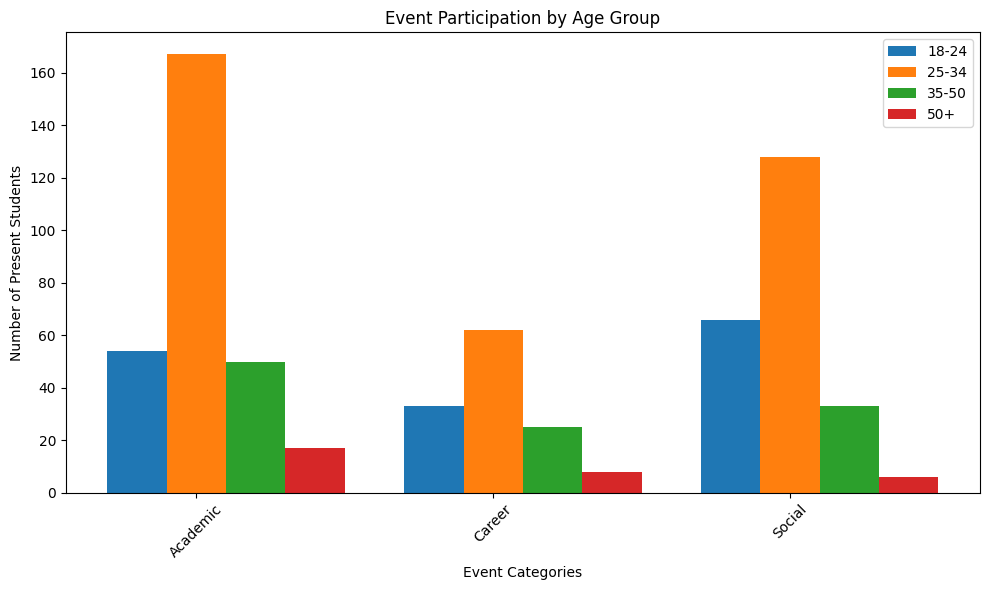

In [6]:
# Step 1
attendance_summary_reset = attendance_summary.reset_index()

# Step 2
df = attendance_summary_reset.melt(id_vars=['Event Category'], 
                                   value_vars=['18-24', '25-34', '35-50', '50+'], 
                                   var_name='Age Group', value_name='Event Count')

# Step 3
pivot_data = df.pivot_table(index='Event Category', 
                            columns='Age Group', 
                            values='Event Count', 
                            aggfunc='sum', 
                            fill_value=0)

# Step 4
width = 0.2 
x = np.arange(len(pivot_data)) 

# Step 5
fig, ax = plt.subplots(figsize=(10, 6))

# Step 6
bars1 = ax.bar(x - width, pivot_data['18-24'], width, label='18-24')
bars2 = ax.bar(x, pivot_data['25-34'], width, label='25-34')
bars3 = ax.bar(x + width, pivot_data['35-50'], width, label='35-50')
bars4 = ax.bar(x + 2 * width, pivot_data['50+'], width, label='50+')

# Step 7
ax.set_xlabel('Event Categories')
ax.set_ylabel('Number of Present Students')
ax.set_title('Event Participation by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45)
ax.legend()

# Step 8
plt.tight_layout()
plt.show()

### Find the Number of Present Event Attendees For Each Age Group

 Code Breakdown
 1) Find sum of the numeric columns in attendance summary
 2) Store the results

In [7]:
# Step 1
age_group_counts = attendance_summary.sum(numeric_only=True)

# Step 2
age_group_counts

18-24    179
25-34    411
35-50    139
50+       37
dtype: int64

### Find the Total Attendance for Each Category

Code Breakdown:
1) Find the sum across age groups for each event
2) Group by event category and sum the total attendance
3) Display results

In [8]:
# Step 1
attendance_summary['Total Attendance'] = attendance_summary[['18-24', '25-34', '35-50', '50+']].sum(axis=1)

# Step 2
event_category_totals = attendance_summary.groupby('Event Category')['Total Attendance'].sum()
event_category_totals = pd.DataFrame(event_category_totals)

# Step 3
event_category_totals

,Total Attendance
Event Category,
Academic,288
Career,128
Social,233


### Calculate Attendance for Each Event Category for Each Age Group

Code Breakdown:
1) Get the total attendance numbers for each age group within each event category
2) Convert to dictionary format for easy reference
3) Print numbers

In [9]:
# Step 1
attendance_by_category_age = attendance_summary.groupby('Event Category')[['18-24', '25-34', '35-50', '50+']].sum()

# Step 2
attendance_numbers = attendance_by_category_age.to_dict()

# Step 3
for category, age_groups in attendance_numbers.items():
    print(f"{category}:")
    for age_group, count in age_groups.items():
        print(f"  {age_group}: {count}")

18-24:
  Academic: 54
  Career: 33
  Social: 66
25-34:
  Academic: 167
  Career: 62
  Social: 128
35-50:
  Academic: 50
  Career: 25
  Social: 33
50+:
  Academic: 17
  Career: 8
  Social: 6


## Analysis #2: Class Attendance Data Analysis

### Gathering Class Attendance & Registration Status Information Using Demographic Data and Class Attendance Data

Code Breakdown:
1) Load and merge datatsets
2) Drop unnnecessary columns
3) Fix blank values
4) Display results

In [10]:
# Step 1
demo_data = pd.read_csv('Demographic_Data.csv')
demo_data = pd.DataFrame(demo_data)

performance_data = pd.read_csv('Class_Performance_Data.csv')
performance_data = pd.DataFrame(performance_data)

demo_performance_data = pd.merge(demo_data, performance_data, on='user_id', how='inner')

# Step 2
demo_performance_data = demo_performance_data.drop(columns=['age', 'hear_about_onlineedu', 'city', 'gender', 'race', 'hispanic', 'high_school_grad', 'ged_received', 'first_gen_college?', 'past_college_enrollment', 'veteran_status', 'Lifetime Credits Completed', 'Lifetime Credits Attempted', 'Lifetime GPA'])

# Step 3
demo_performance_data = demo_performance_data.fillna('')

# Step 4
demo_performance_data

,user_id,term_number,zipcode,state,registration_status,course_name,avg_attendance,avg_assignment_grade,avg_assignment_submission_rate,avg_on_time_assignment_submission_rate,class_status,final_grade
0,5,4,46635,IN,Add/Drop,English Composition,11%,0%,0%,0%,Withdrawn,W
1,5,4,46635,IN,Add/Drop,Business Skills: Presentation Skills,0%,0%,0%,0%,Withdrawn,DNS
2,7,4,83221,ID,Add/Drop,Advanced Composition,25%,0%,0%,0%,Withdrawn,W
3,7,4,83221,ID,Add/Drop,Introduction to Logic & Critical Thinking,44%,17%,33%,33%,Withdrawn,W
4,7,4,83221,ID,Add/Drop,Principles of Marketing,30%,0%,0%,0%,Withdrawn,W
...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1696,1,89030,NV,Withdrawn,Introduction to Business,46%,29%,37%,21%,Withdrawn,W
4235,1706,1,23504,VA,Withdrawn,College Success,50%,37%,30%,30%,Withdrawn,W
4236,1709,1,76133,TX,Withdrawn,College Success,61%,51%,33%,17%,Withdrawn,W
4237,1709,1,76133,TX,Withdrawn,English Composition,53%,28%,30%,10%,Withdrawn,W


### Graph the Spread of Registration Status Across All Unique OnlineEdu Students

Code Breakdown:
1) Count the occurrences of each unique value in the 'registration_status' column
2) Plot the results as a bar graph
3) Add title and labels
4) Display results

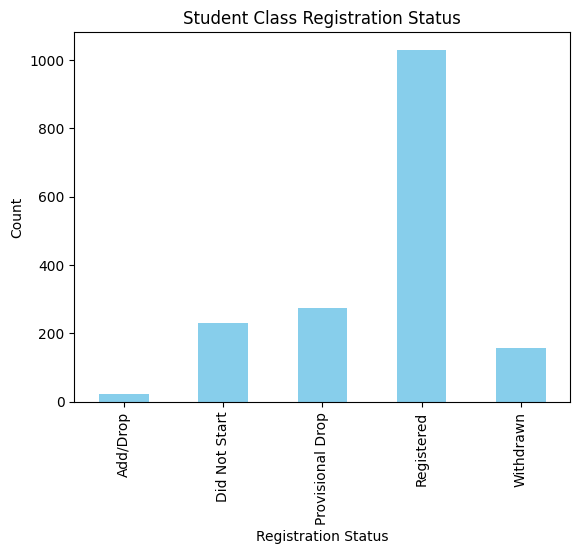

registration_status
Add/Drop              24
Did Not Start        229
Provisional Drop     273
Registered          1030
Withdrawn            157
Name: user_id, dtype: int64

In [11]:
# Step 1
registration_counts = demo_data.groupby('registration_status')['user_id'].nunique()

# Step 2
registration_counts.plot(kind='bar', color='skyblue')

# Step 3
plt.title('Student Class Registration Status')
plt.xlabel('Registration Status')
plt.ylabel('Count')

# Step 4
plt.show()
registration_counts


### Fix Any Missing Gaps in State Data Based on Zip Code

Code Breakdown:
1) Create dictionary of missing state values based on zip code key
2) Replace blank value with dictionary values
3) Display results

In [12]:
# Debugging Stuff
# Filter records with an empty or missing state
# empty_state_records = demo_performance_data[demo_performance_data["state"].isna() | (demo_performance_data["state"] == '')]

# Display result
# empty_state_records

# Step 1
zip_to_state_mapping = {
    '31015': 'GA',  # Replace ZIP 90001 with California
    '60633': 'IL',    # Replace ZIP 10001 with New York
}

# Step 2
demo_performance_data["state"] = demo_performance_data.apply(
    lambda row: zip_to_state_mapping.get(str(row["zipcode"]), row["state"]) 
    if pd.isna(row["state"]) or row["state"] == '' else row["state"], axis=1
)

# Step 3
demo_performance_data


,user_id,term_number,zipcode,state,registration_status,course_name,avg_attendance,avg_assignment_grade,avg_assignment_submission_rate,avg_on_time_assignment_submission_rate,class_status,final_grade
0,5,4,46635,IN,Add/Drop,English Composition,11%,0%,0%,0%,Withdrawn,W
1,5,4,46635,IN,Add/Drop,Business Skills: Presentation Skills,0%,0%,0%,0%,Withdrawn,DNS
2,7,4,83221,ID,Add/Drop,Advanced Composition,25%,0%,0%,0%,Withdrawn,W
3,7,4,83221,ID,Add/Drop,Introduction to Logic & Critical Thinking,44%,17%,33%,33%,Withdrawn,W
4,7,4,83221,ID,Add/Drop,Principles of Marketing,30%,0%,0%,0%,Withdrawn,W
...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1696,1,89030,NV,Withdrawn,Introduction to Business,46%,29%,37%,21%,Withdrawn,W
4235,1706,1,23504,VA,Withdrawn,College Success,50%,37%,30%,30%,Withdrawn,W
4236,1709,1,76133,TX,Withdrawn,College Success,61%,51%,33%,17%,Withdrawn,W
4237,1709,1,76133,TX,Withdrawn,English Composition,53%,28%,30%,10%,Withdrawn,W


### Designate Regions Based on State as a New Column and Calculate Average Individual Student Attendance

Code Breakdown:
1) Convert avg_attendance to numeric
2) Calculate each student's average attendance
3) Rename column for clarity
4) Merge state, zip code, and registration status
5) Define a state-to-region mapping
6) Map state to region
7) Display results

In [13]:
# Step 1
demo_performance_data["avg_attendance"] = demo_performance_data["avg_attendance"].astype(str).str.rstrip('%').astype(float)

# Step 2
student_avg_attendance = demo_performance_data.groupby("user_id")["avg_attendance"].mean().reset_index()

# Step 3
student_avg_attendance.rename(columns={"avg_attendance": "student_avg_attendance"}, inplace=True)

# Step 4
student_avg_attendance = student_avg_attendance.merge(demo_performance_data[['user_id', 'state', 'zipcode', 'registration_status']].drop_duplicates(), on='user_id', how='left')

# Step 5
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South',
    'MO': 'Midwest', 'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast', 'NC': 'South',
    'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast',
    'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South',
    'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South', 'WA': 'West',
    'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}

# Step 6
student_avg_attendance['region'] = student_avg_attendance['state'].map(state_to_region)

# Step 7
student_avg_attendance.head()

,user_id,student_avg_attendance,state,zipcode,registration_status,region
0,0,98.000000,CA,95660,Registered,West
1,1,99.666667,PA,17061,Registered,Northeast
2,2,71.000000,PA,19133,Registered,Northeast
3,4,83.333333,TX,78411,Registered,South
4,5,5.500000,IN,46635,Add/Drop,Midwest


### Generate Attendance Datasets for Northeast and West Region

Code Breakdown:
1) Filter the data for Northeast and West region
2) Create zipcode groups (group by first 3 digits)
3) Count of students by zipcode group (total count, no registration status filtering) in Northeast and West region
4) Count of each registration status by zipcode group in Northeast and West region
5) Merge the total students count with registration status counts for Northeast region and add region column back to dataframe
6) Merge the total students count with registration status counts for West region and add region column back to dataframe
7) Classify zip code groups into zones (Urban, Suburban, and Rural)

In [14]:
# Step 1
northeast_data = student_avg_attendance[student_avg_attendance['region'] == 'Northeast']
west_data = student_avg_attendance[student_avg_attendance['region'] == 'West']

# Step 2
northeast_data['zipcode_group'] = northeast_data['zipcode'].apply(lambda x: str(x)[:3])
west_data['zipcode_group'] = west_data['zipcode'].apply(lambda x: str(x)[:3])

# Step 3
northeast_total_counts = northeast_data.groupby('zipcode_group').size().reset_index(name='total_students')
west_total_counts = west_data.groupby('zipcode_group').size().reset_index(name='total_students')

# Step 4
northeast_counts = northeast_data.groupby(['zipcode_group', 'registration_status']).size().unstack(fill_value=0)
west_counts = west_data.groupby(['zipcode_group', 'registration_status']).size().unstack(fill_value=0)

# Step 5
northeast_combined = northeast_total_counts.merge(northeast_counts, on='zipcode_group', how='left')
northeast_combined['region'] = 'Northeast'

# Step 6
west_combined = west_total_counts.merge(west_counts, on='zipcode_group', how='left')
west_combined['region'] = 'West'

# Step 7
def classify_zip_zone(zipcode_group, region):
    zipcode_group = int(zipcode_group)  # Convert to integer for comparison
    
    if region == "Northeast":
        if 100 <= zipcode_group <= 199:
            return "Urban Core"
        elif 200 <= zipcode_group <= 499:
            return "Suburban/Mid-Sized Cities"
        else:
            return "Rural/Outer Areas"

    elif region == "West":
        if 800 <= zipcode_group <= 899:
            return "Urban Core"
        elif 900 <= zipcode_group <= 949:
            return "Suburban/Mid-Sized Cities"
        else:
            return "Rural/Outer Areas"
    
    return "Unknown"  # If the region isn't recognized

northeast_combined["zone"] = northeast_combined.apply(lambda row: classify_zip_zone(row["zipcode_group"], row["region"]), axis=1)
west_combined["zone"] = west_combined.apply(lambda row: classify_zip_zone(row["zipcode_group"], row["region"]), axis=1)

/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/4058000630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northeast_data['zipcode_group'] = northeast_data['zipcode'].apply(lambda x: str(x)[:3])
/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/4058000630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_data['zipcode_group'] = west_data['zipcode'].apply(lambda x: str(x)[:3])


Display results for Northeast Region

In [15]:
# Display the combined results for both regions
print("Northeast Region Combined Counts (Total Students and Registration Status):")

northeast_combined


Northeast Region Combined Counts (Total Students and Registration Status):


,zipcode_group,total_students,Add/Drop,Did Not Start,Provisional Drop,Registered,Withdrawn,region,zone
0,100,5,0,0,0,5,0,Northeast,Urban Core
1,101,1,0,1,0,0,0,Northeast,Urban Core
2,102,1,0,0,1,0,0,Northeast,Urban Core
3,104,16,0,0,2,12,2,Northeast,Urban Core
4,105,1,0,0,0,1,0,Northeast,Urban Core
...,...,...,...,...,...,...,...,...,...
98,840,1,0,0,0,1,0,Northeast,Rural/Outer Areas
99,861,4,0,1,1,2,0,Northeast,Rural/Outer Areas
100,869,1,0,0,0,1,0,Northeast,Rural/Outer Areas
101,886,1,0,0,0,1,0,Northeast,Rural/Outer Areas


Display results for West Region

In [16]:
print("West Region Combined Counts (Total Students and Registration Status):")

west_combined

West Region Combined Counts (Total Students and Registration Status):


,zipcode_group,total_students,Add/Drop,Did Not Start,Provisional Drop,Registered,Withdrawn,region,zone
0,381,1,0,0,1,0,0,West,Rural/Outer Areas
1,800,7,1,0,1,5,0,West,Urban Core
2,802,4,0,0,1,3,0,West,Urban Core
3,803,1,0,0,0,1,0,West,Urban Core
4,806,1,0,0,1,0,0,West,Urban Core
...,...,...,...,...,...,...,...,...,...
78,984,3,0,1,0,2,0,West,Rural/Outer Areas
79,985,2,0,0,0,2,0,West,Rural/Outer Areas
80,986,1,0,0,0,0,1,West,Rural/Outer Areas
81,992,1,0,0,1,0,0,West,Rural/Outer Areas


### Get Zipcode Groups in List Form for Each Region

Code Breakdown:
1) Get and sort unique zipcode groups for Northeast and West region
2) Display results

In [17]:
# Step 1
northeast_zipcode_groups = sorted(northeast_combined['zipcode_group'].unique())
west_zipcode_groups = sorted(west_combined['zipcode_group'].unique())

# Step 2
print("Sorted Unique Zipcode Groups in Northeast Region:")
print(northeast_zipcode_groups)

print("Sorted Unique Zipcode Groups in West Region:")
print(west_zipcode_groups)

Sorted Unique Zipcode Groups in Northeast Region:
['100', '101', '102', '104', '105', '107', '109', '110', '111', '112', '113', '114', '115', '116', '117', '121', '130', '133', '135', '136', '139', '142', '146', '151', '152', '154', '159', '160', '163', '167', '168', '169', '170', '171', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '185', '186', '187', '190', '191', '193', '196', '197', '206', '207', '211', '212', '213', '215', '230', '232', '236', '276', '387', '405', '465', '601', '604', '610', '611', '626', '632', '634', '640', '649', '651', '670', '685', '690', '701', '706', '708', '709', '710', '720', '730', '741', '750', '764', '780', '801', '802', '808', '809', '810', '830', '833', '834', '840', '861', '869', '886', '888']
Sorted Unique Zipcode Groups in West Region:
['381', '800', '802', '803', '806', '808', '809', '810', '812', '814', '820', '832', '836', '837', '840', '841', '847', '850', '851', '852', '853', '856', '857', '864', '870', '871', 

### Graph The Spread Across Zones for Northeast and West Regions

Code Breakdown:
1) Group by zone and sum the total_students for Northeast and West region
2) Create bar chart
3) Plot the bar chart for Northeast region
4) Plot the bar chart for West region
5) Adjust layout to prevent overlap and display results

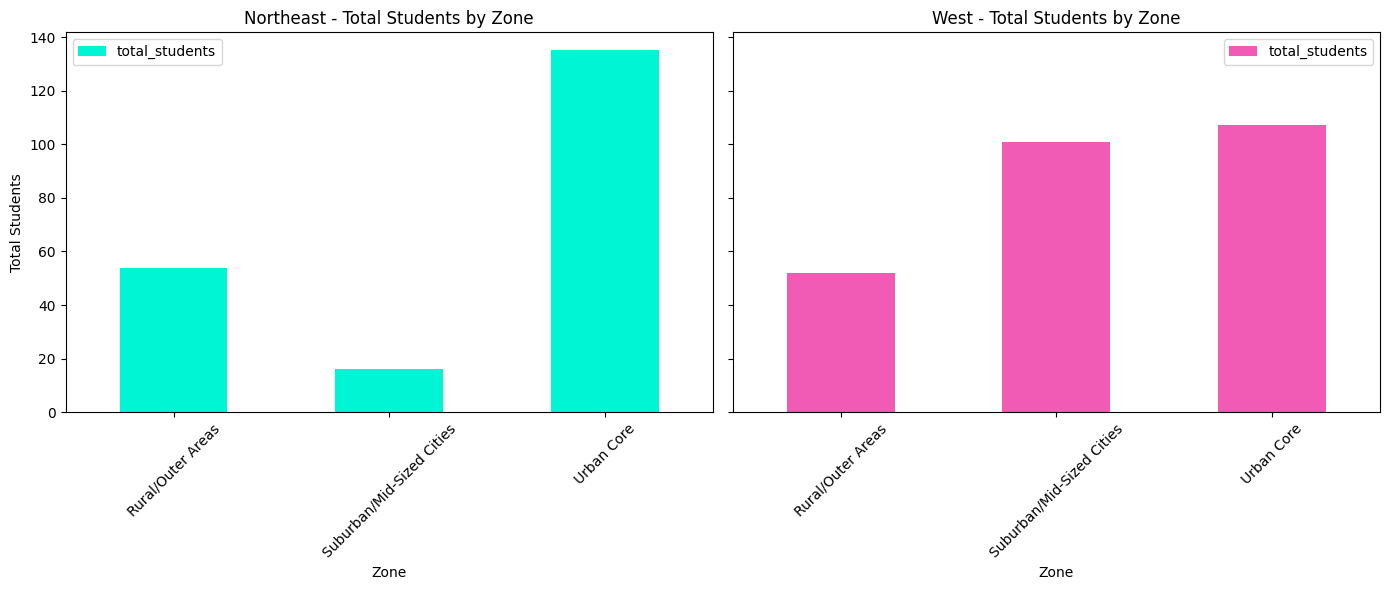

In [18]:
# Step 1
northeast_data = northeast_combined.groupby("zone")["total_students"].sum().reset_index()
west_data = west_combined.groupby("zone")["total_students"].sum().reset_index()

# Step 2
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Step 3
northeast_data.plot(kind="bar", x="zone", y="total_students", ax=axes[0], color='#00F5D4')
axes[0].set_title("Northeast - Total Students by Zone")
axes[0].set_xlabel("Zone")
axes[0].set_ylabel("Total Students")
axes[0].tick_params(axis="x", rotation=45)

# Step 4
west_data.plot(kind="bar", x="zone", y="total_students", ax=axes[1], color='#F15BB5')
axes[1].set_title("West - Total Students by Zone")
axes[1].set_xlabel("Zone")
axes[1].set_ylabel("Total Students")
axes[1].tick_params(axis="x", rotation=45)

# Step 5
plt.tight_layout()
plt.show()


#### Print Northeast Data Zone Counts

In [19]:
northeast_data

,zone,total_students
0,Rural/Outer Areas,54
1,Suburban/Mid-Sized Cities,16
2,Urban Core,135


#### Print West Data Zone Counts

In [20]:
west_data

,zone,total_students
0,Rural/Outer Areas,52
1,Suburban/Mid-Sized Cities,101
2,Urban Core,107


### Calculate the Percentages of Each Registration Status Type in All Zones for Northeast and West Region

Code Breakdown:
1) Define total leraners per zone
2) Summarize registration counts per zone
3) Calculate percentage of each registration status per zone
4) Display results

In [21]:
# Step 1
ne_total_learners = {
    "Rural/Outer Areas": 54,
    "Suburban/Mid-Sized Cities": 16,
    "Urban Core": 135
}

# Step 2
northeast_zone_summary = northeast_combined.groupby("zone")[['Add/Drop', 'Did Not Start', 'Provisional Drop', 'Registered', 'Withdrawn']].sum().reset_index()

# Step 3
for zone in northeast_zone_summary['zone']:
    total_students_in_zone = ne_total_learners.get(zone, 0)
    for column in ['Add/Drop', 'Did Not Start', 'Provisional Drop', 'Registered', 'Withdrawn']:
        northeast_zone_summary.loc[northeast_zone_summary['zone'] == zone, f"{column}_percent"] = (northeast_zone_summary.loc[northeast_zone_summary['zone'] == zone, column] / total_students_in_zone) * 100

# Step 4
northeast_zone_summary

,zone,Add/Drop,Did Not Start,Provisional Drop,Registered,Withdrawn,Add/Drop_percent,Did Not Start_percent,Provisional Drop_percent,Registered_percent,Withdrawn_percent
0,Rural/Outer Areas,1,3,5,40,5,1.851852,5.555556,9.259259,74.074074,9.259259
1,Suburban/Mid-Sized Cities,1,1,1,13,0,6.250000,6.250000,6.250000,81.250000,0.000000
2,Urban Core,1,13,15,97,9,0.740741,9.629630,11.111111,71.851852,6.666667


In [22]:
# Step 1
w_total_learners = {
    "Rural/Outer Areas": 52,
    "Suburban/Mid-Sized Cities": 101,
    "Urban Core": 107
}

# Step 2
west_zone_summary = west_combined.groupby("zone")[['Add/Drop', 'Did Not Start', 'Provisional Drop', 'Registered', 'Withdrawn']].sum().reset_index()

# Step 3
for zone in west_zone_summary['zone']:
    total_students_in_zone = w_total_learners.get(zone, 0)  # Get total number of learners for the zone
    for column in ['Add/Drop', 'Did Not Start', 'Provisional Drop', 'Registered', 'Withdrawn']:
        west_zone_summary.loc[west_zone_summary['zone'] == zone, f"{column}_percent"] = (west_zone_summary.loc[west_zone_summary['zone'] == zone, column] / total_students_in_zone) * 100

# Step 4
west_zone_summary

,zone,Add/Drop,Did Not Start,Provisional Drop,Registered,Withdrawn,Add/Drop_percent,Did Not Start_percent,Provisional Drop_percent,Registered_percent,Withdrawn_percent
0,Rural/Outer Areas,2,2,9,32,7,3.846154,3.846154,17.307692,61.538462,13.461538
1,Suburban/Mid-Sized Cities,2,11,21,59,8,1.980198,10.891089,20.792079,58.415842,7.920792
2,Urban Core,5,12,14,67,9,4.672897,11.214953,13.084112,62.616822,8.411215


### Graph the Spread of Registration Status Across Northeast and West Regions

Code Breakdown:
1) Filter and group by region and registration_status, and count the occurrences
2) Plot the stacked bar graph with the desired figure size
3) Add labels and title
4) Adjust the legend location so it doesn't overlap with the graph
5) Adjust layout to prevent clipping of the legend
6) Display results

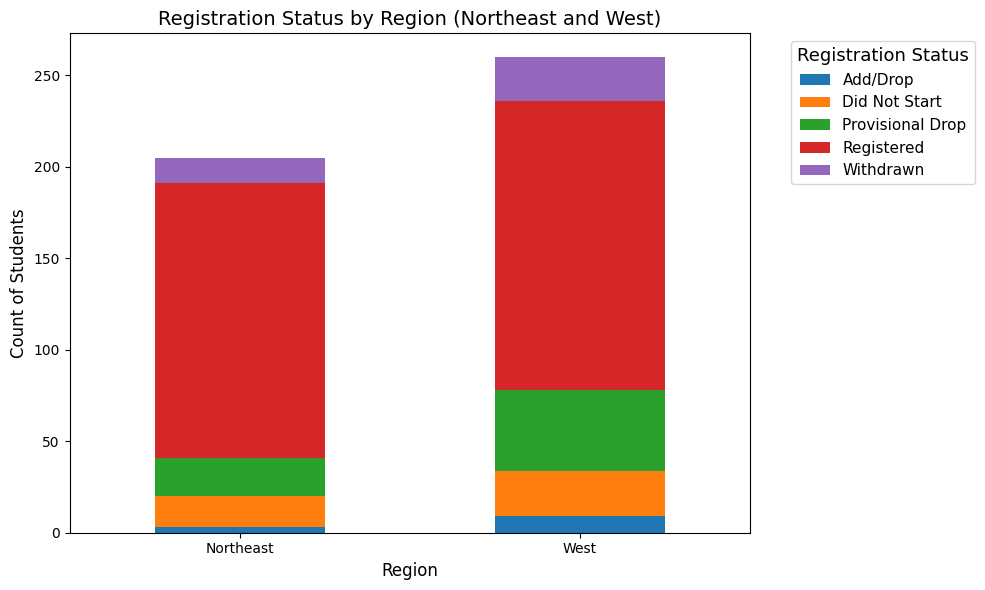

registration_status,Add/Drop,Did Not Start,Provisional Drop,Registered,Withdrawn
region,,,,,
Northeast,3,17,21,150,14
West,9,25,44,158,24


In [23]:
# Step 1
filtered_data = student_avg_attendance[student_avg_attendance['region'].isin(['Northeast', 'West'])]
region_registration_counts = filtered_data.groupby(['region', 'registration_status']).size().unstack(fill_value=0)

# Step 2
ax = region_registration_counts.plot(kind='bar', stacked=True, figsize=(10, 6))  # Set figure size (width=10, height=6)

# Step 3
plt.title('Registration Status by Region (Northeast and West)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.xticks(rotation=0)  # To keep region names horizontal

# Step 4
plt.legend(title='Registration Status', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 5
plt.tight_layout()

# Step 6
plt.show()
region_registration_counts

### Find Total Number of Students per State and Calculate the State Average Attendance 

Code Breakdown:
1) Group by state and calculate the average student attendance.
2) Ensure avg_attendance is numeric by removing any % signs.
3) Calculate each student's overall average class attendance.
4) Rename the column for clarity.
5) Merge the state information from demo_performance_data.
6) Calculate the average attendance per state.
7) Rename the column for clarity.
8) Calculate the total number of students per state.
9) Merge the total student count with the state average attendance DataFrame.
10) Display the final result.

In [24]:
# Step 1
state_avg_attendance = student_avg_attendance.groupby('state')['student_avg_attendance'].mean()

# Step 2
demo_performance_data["avg_attendance"] = demo_performance_data["avg_attendance"].astype(str).str.rstrip('%').astype(float)

# Step 3
student_avg_attendance = demo_performance_data.groupby("user_id")["avg_attendance"].mean().reset_index()

# Step 4
student_avg_attendance.rename(columns={"avg_attendance": "student_avg_attendance"}, inplace=True)

# Step 5
student_avg_attendance = student_avg_attendance.merge(demo_performance_data[['user_id', 'state']].drop_duplicates(), on='user_id', how='left')

# Step 6
state_avg_attendance = student_avg_attendance.groupby("state")["student_avg_attendance"].mean().reset_index()

# Step 7
state_avg_attendance.rename(columns={"student_avg_attendance": "state_avg_attendance"}, inplace=True)

# Step 8
state_student_count = student_avg_attendance.groupby("state")["user_id"].nunique().reset_index()
state_student_count.rename(columns={"user_id": "total_students"}, inplace=True)

# Step 9
state_avg_attendance = state_avg_attendance.merge(state_student_count, on="state", how="left")

# Step 10
state_avg_attendance


,state,state_avg_attendance,total_students
0,AK,85.333333,1
1,AL,60.036585,41
2,AR,54.467593,36
3,AZ,64.017544,38
4,CA,62.163017,137
5,CO,67.547619,21
6,CT,66.500000,17
7,FL,60.212885,119
8,GA,60.717662,134
9,HI,27.333333,1


### Plot Average Class Attendance of All States

Code Breakdown:
1) Sort the data by average attendance in ascending order.
2) Create a horizontal bar chart with the sorted data and set the figure size for the plot.
3) Plot the horizontal bar chart with states on the y-axis and average attendance on the x-axis.
4) Add labels for the y-axis (State), x-axis (Average Attendance (%)), and the title (Average Class Attendance by State (Highest to Lowest)).
5) Adjust the layout to ensure the plot fits well and display results

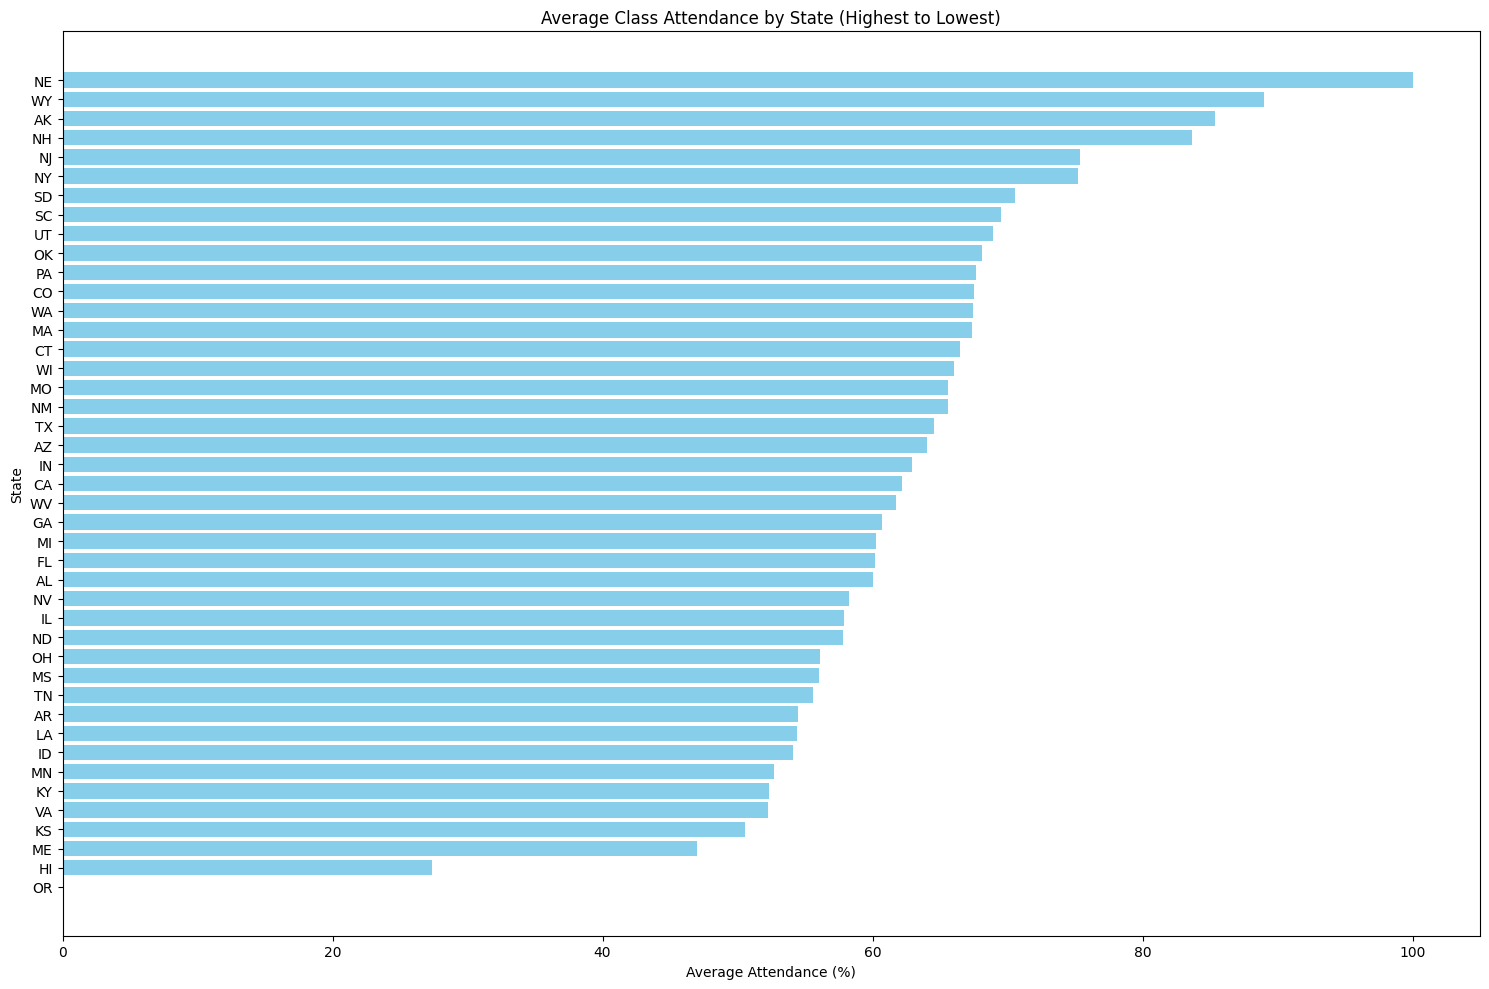

In [25]:
# Step 1
state_avg_attendance_sorted = state_avg_attendance.sort_values(by='state_avg_attendance', ascending=True)

# Step 2
plt.figure(figsize=(15, 10))

# Step 3
plt.barh(state_avg_attendance_sorted['state'], state_avg_attendance_sorted['state_avg_attendance'], color='skyblue')

# Step 4
plt.ylabel('State')
plt.xlabel('Average Attendance (%)')
plt.title('Average Class Attendance by State (Highest to Lowest)')

# Step 5
plt.tight_layout()
plt.show()

### Map State Abbreviations to Regions

Code Breakdown:
1) Create a dictionary mapping state abbreviations to regions
2) Map the region to each state abbreviation in the DataFrame
3) Sort the data by average attendance in descending order
4) Display results

In [26]:
# Step 1
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South',
    'MO': 'Midwest', 'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast', 'NC': 'South',
    'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast',
    'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South',
    'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South', 'WA': 'West',
    'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}

# Step 2
state_avg_attendance['region'] = state_avg_attendance['state'].map(state_to_region)

# Step 3
region_avg_attendance_sorted = state_avg_attendance.sort_values(by='region', ascending=True)

# Step 4
region_avg_attendance_sorted

,state,state_avg_attendance,total_students,region
29,OH,56.139535,86,Midwest
40,WI,66.000000,4,Midwest
34,SD,70.541667,8,Midwest
23,NE,100.000000,1,Midwest
22,ND,57.833333,4,Midwest
20,MO,65.606061,55,Midwest
19,MN,52.702899,23,Midwest
11,IL,57.902116,63,Midwest
12,IN,62.914966,49,Midwest
13,KS,50.575758,11,Midwest


### Calculate the Regional Average Class Attendance Based on State Average Attendance for Each Region

Code Breakdown:
1) Calculate the average attendance per region
2) Rename the column to reflect "region average attendance"
3) Calculate the total number of students per region
4) Merge the total students count with the region_avg_attendance DataFrame
5) Display results

In [27]:
# Step 1
region_avg_attendance = state_avg_attendance.groupby("region")["state_avg_attendance"].mean().reset_index()

# Step 2
region_avg_attendance = region_avg_attendance.rename(columns={"state_avg_attendance": "region_avg_attendance"})

# Step 3
region_student_count = state_avg_attendance.groupby("region")["total_students"].sum().reset_index()

# Step 4
region_avg_attendance = region_avg_attendance.merge(region_student_count, on="region", how="left")

# Step 5
region_avg_attendance

,region,region_avg_attendance,total_students
0,Midwest,63.681375,359
1,Northeast,68.963088,205
2,South,59.230583,821
3,West,59.137935,260


Code Breakdown:
1) Group the data by state and aggregate all unique zip codes for each state into a comma-separated string.
2) Merge the zip codes with the state_avg_attendance data, linking them by the state.
3) Filter the data to include only the Northeast and West regions.
4) Sort the filtered data by the region in either ascending or descending order as needed.
5) Select the columns for the region and zip codes from the sorted data.
6) Group the data by region and aggregate the zip codes into a comma-separated list for each region.
7) Ensure that the user_id is present in the data. If it’s missing, merge it back using the state column.
8) Group the data by region and aggregate the unique user IDs for each region into a comma-separated string.
9) Merge the zip codes data with the user IDs data by the region.
10) Display the final result containing the region, its zip codes, and associated user IDs.

In [28]:
# Step 1
state_zipcodes = demo_performance_data.groupby("state")["zipcode"].unique().apply(lambda x: ", ".join(map(str, x))).reset_index()

# Step 2
state_avg_attendance = state_avg_attendance.merge(state_zipcodes, on="state", how="left")

# Step 3
filtered_state_avg_attendance = state_avg_attendance[state_avg_attendance['region'].isin(['Northeast', 'West'])]

# Step 4
sorted_filtered_state_avg_attendance = filtered_state_avg_attendance.sort_values(by='region', ascending=False)

# Step 5
high_low_zipcodes = sorted_filtered_state_avg_attendance[['region', 'zipcode']]

# Step 6
region_zipcodes = sorted_filtered_state_avg_attendance.groupby('region')['zipcode'].apply(lambda x: ", ".join(x)).reset_index()

# Step 7
if 'user_id' not in sorted_filtered_state_avg_attendance.columns:
    sorted_filtered_state_avg_attendance = sorted_filtered_state_avg_attendance.merge(demo_performance_data[['user_id', 'state']], on='state', how='left')

# Step 8
region_user_ids = sorted_filtered_state_avg_attendance.groupby('region')['user_id'].unique().apply(lambda x: ", ".join(map(str, x))).reset_index()

# Step 9
region_zipcodes_with_users = region_zipcodes.merge(region_user_ids, on='region', how='left')

# Step 10
region_zipcodes_with_users

,region,zipcode,user_id
0,Northeast,"4055, 4654, 1108, 2124, 1013, 1510, 1107, 1028...","255, 894, 222, 398, 545, 1511, 1429, 1588, 168..."
1,West,"99504, 85381, 85629, 85022, 85205, 85641, 8502...","644, 28, 428, 516, 1261, 1280, 1308, 1377, 906..."


#### Gather a List of All Unique Zip Code Groups from Norhteast and West Regions Respectively

Code Breakdown:
1) Group by region and aggregate all zip codes into a comma-separated string for each region
2) Sort zipcodes in zipcodes column
3) Convert the DataFrame to a dictionary
4) Display results

In [29]:
# Step 1
region_zipcodes = region_zipcodes_with_users.groupby('region')['zipcode'].apply(lambda x: ", ".join(x)).reset_index()

# Step 2
region_zipcodes['zipcode'] = region_zipcodes['zipcode'].apply(lambda x: ', '.join(sorted(x.split(', '))))

# Step 3
region_zipcodes_dict = region_zipcodes.set_index('region')['zipcode'].to_dict()
user_zipcodes_dict = region_zipcodes_with_users.set_index('region')['user_id'].to_dict()

# Step 4
region_zipcodes_dict
user_zipcodes_dict

{'Northeast': '255, 894, 222, 398, 545, 1511, 1429, 1588, 1688, 26, 130, 191, 325, 364, 379, 648, 784, 831, 1441, 1480, 1504, 1585, 1598, 1637, 12, 521, 323, 543, 729, 620, 1037, 18, 82, 87, 93, 123, 203, 225, 250, 339, 429, 456, 571, 762, 799, 880, 961, 1005, 1034, 1038, 1086, 1115, 1178, 1251, 1330, 1399, 1417, 1476, 1547, 1632, 294, 1024, 1248, 879, 1633, 877, 1197, 1327, 1430, 1622, 1708, 503, 592, 629, 630, 654, 670, 717, 728, 780, 805, 819, 832, 853, 915, 933, 956, 1010, 1022, 1045, 1052, 1107, 1136, 1147, 1161, 1179, 1180, 1219, 1222, 1243, 1259, 1270, 1278, 1332, 1343, 1356, 1408, 1409, 1472, 1542, 1552, 1576, 1587, 1618, 1656, 1673, 642, 1360, 1691, 513, 1031, 1325, 105, 146, 611, 1117, 1194, 1324, 1373, 1410, 1436, 1606, 1626, 47, 518, 758, 835, 911, 1300, 1335, 1586, 1591, 1639, 1651, 817, 1080, 1103, 1388, 1509, 1675, 1685, 1, 2, 15, 29, 40, 49, 90, 104, 126, 127, 135, 142, 161, 190, 296, 357, 414, 425, 464, 468, 499, 668, 727, 730, 741, 766, 789, 850, 863, 950, 997, 1078, 

### Graph The Average Class Attendance Rate By Region

Code Breakdown:
1) Plot the sorted horizontal bar chart
2) Adding labels and title
3) Display the plot

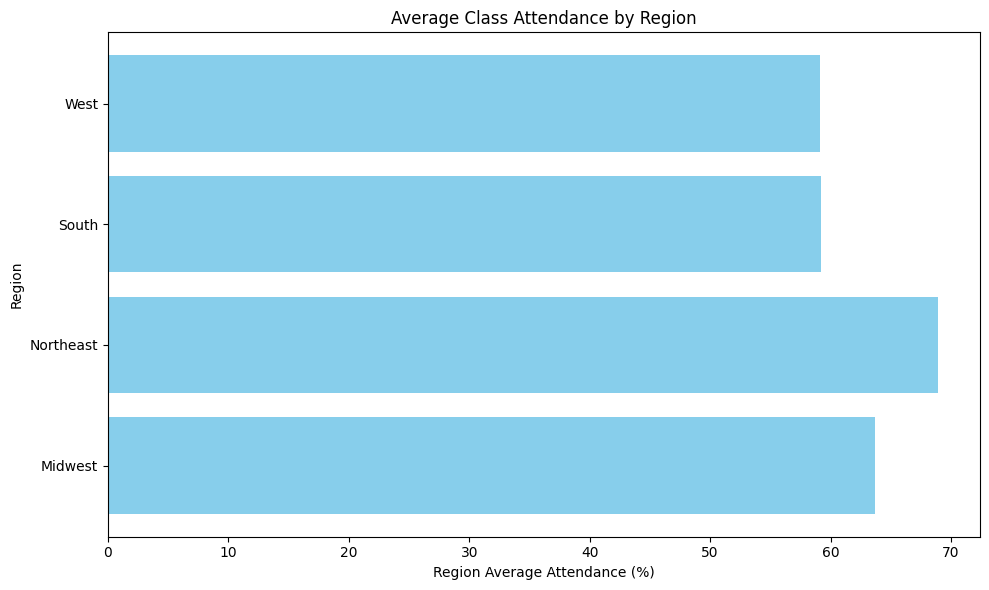

In [30]:
# Step 1
plt.figure(figsize=(10, 6))
plt.barh(region_avg_attendance['region'], region_avg_attendance['region_avg_attendance'], color='skyblue')

# Step 2
plt.ylabel('Region')
plt.xlabel('Region Average Attendance (%)')
plt.title('Average Class Attendance by Region')

# Step 3
plt.tight_layout()
plt.show()

## Analysis #3: Platform Engagement Data Analysis

### Sorting Based on Age Group Using Demographic Data and Platform Engagement Data

Code Breakdown:
1) Load the csv files and convert them into respective DataFrames
2) Merge the dataframes
3) Drop unnecessary columns
4) Fill in missing values
5) Create age group bins and labels
6) Categorize ages into age groups
7) Display results

In [31]:
# Step 1
demo_data = pd.read_csv('Demographic_Data.csv')
demo_data = pd.DataFrame(demo_data)

engagement_data = pd.read_csv('Platform_Engagement_Data.csv')
engagement_data = pd.DataFrame(engagement_data)

# Step 2
demo_engagement_data = pd.merge(demo_data, engagement_data, on='user_id', how='inner')

# Step 3
demo_engagement_data = demo_engagement_data.drop(columns=['term_number', 'gender', 'race', 'hispanic', 'high_school_grad', 'ged_received', 'first_gen_college?', 'past_college_enrollment', 'zipcode', 'city', 'state', 'veteran_status', 'registration_status', 'Lifetime Credits Completed', 'Lifetime Credits Attempted', 'Lifetime GPA'])

# Step 4
demo_engagement_data = demo_engagement_data.fillna('')

# Step 5
age_bins = [18, 24, 34, 50, float('inf')]
age_labels = ['18-24', '25-34', '35-50', '50+']

# Step 6
demo_engagement_data['age_group'] = pd.cut(demo_engagement_data['age'], bins=age_bins, labels=age_labels, right=False)

# Step 7
demo_engagement_data

,user_id,hear_about_onlineedu,age,avg_messages_sent_per_week,avg_portal_connections_per_week,age_group
0,5,other,46,0.2,0.2,35-50
1,7,facebook,39,5.8,5.2,35-50
2,8,dontknow,26,1.4,0.3,25-34
3,28,instagram,29,2.8,1.0,25-34
4,34,dontknow,23,5.1,15.0,18-24
...,...,...,...,...,...,...
1702,1680,internetSearch,28,22.6,41.0,25-34
1703,1684,tiktok,19,20.5,16.0,18-24
1704,1696,other,22,30.4,22.0,18-24
1705,1706,facebook,30,9.9,43.2,25-34


### Graph The Average of the Average of Messages Sent In a Week & Average of Average CW Connections Per Week For Each Age Group

Code Breakdown: 
1) Translate the data in the column into numeric values
2) Calculate the mean for each age group and store in a DataFrame
3) Create graph
4) Add labels
5) Display results

/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/3208682968.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_messages_by_age_group = demo_engagement_data.groupby('age_group')['avg_messages_sent_per_week'].mean()


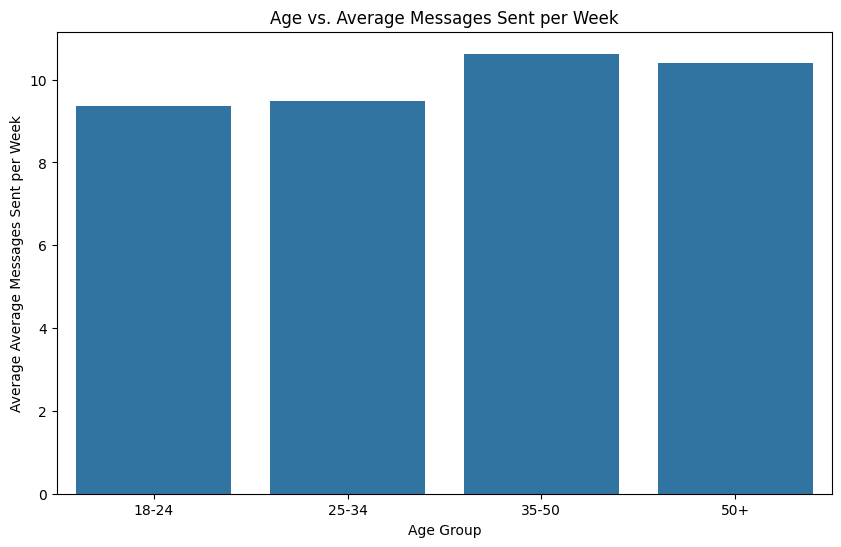

,age_group,avg_messages_sent_per_week
0,18-24,9.361886
1,25-34,9.488523
2,35-50,10.626116
3,50+,10.407632


In [32]:
# Step 1
demo_engagement_data['avg_messages_sent_per_week'] = pd.to_numeric(demo_engagement_data['avg_messages_sent_per_week'], errors='coerce')

# Step 2
avg_messages_by_age_group = demo_engagement_data.groupby('age_group')['avg_messages_sent_per_week'].mean()
avg_messages_by_age_group = pd.DataFrame(avg_messages_by_age_group).reset_index()

# Step 3
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_messages_by_age_group, x='age_group', y='avg_messages_sent_per_week')

# Step 4
plt.title('Age vs. Average Messages Sent per Week')
plt.xlabel('Age Group')
plt.ylabel('Average Average Messages Sent per Week')

# Step 5
plt.show()
avg_messages_by_age_group

Code Breakdown: 
1) Translate the data in the column into numeric values
2) Calculate the mean for each age group and store in a DataFrame
3) Create graph
4) Add labels
5) Display results

/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/1175365839.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_connections_by_age_group = demo_engagement_data.groupby('age_group')['avg_portal_connections_per_week'].mean()


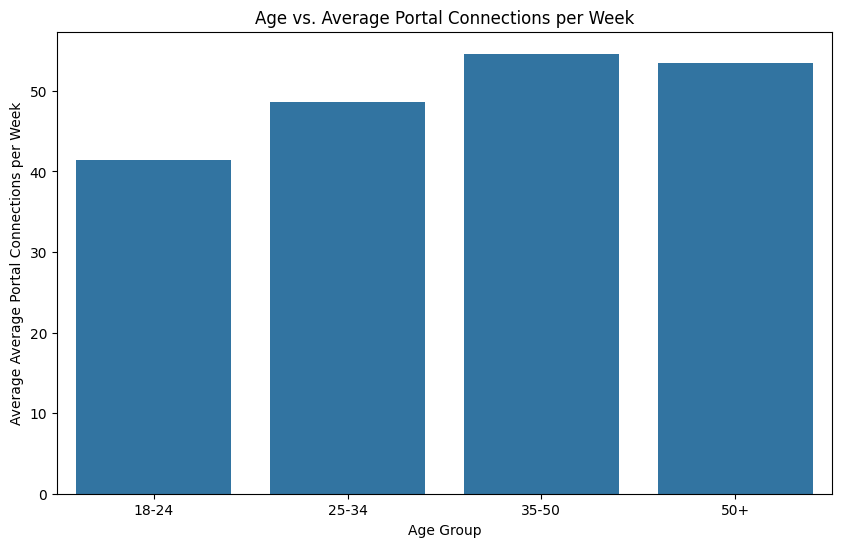

,age_group,avg_portal_connections_per_week
0,18-24,41.473409
1,25-34,48.645407
2,35-50,54.611069
3,50+,53.405263


In [33]:
# Step 1
demo_engagement_data['avg_portal_connections_per_week'] = pd.to_numeric(demo_engagement_data['avg_portal_connections_per_week'], errors='coerce')

# Step 2
avg_connections_by_age_group = demo_engagement_data.groupby('age_group')['avg_portal_connections_per_week'].mean()
avg_connections_by_age_group = pd.DataFrame(avg_connections_by_age_group).reset_index()

# Set 3
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_connections_by_age_group, x='age_group', y='avg_portal_connections_per_week')

# Step 4
plt.title('Age vs. Average Portal Connections per Week')
plt.xlabel('Age Group')
plt.ylabel('Average Average Portal Connections per Week')

# Step 5
plt.show()
avg_connections_by_age_group

### Graph the Spread of the Different Discovery Methods For Each Age Group

Code Breakdown:
1) Define age groups and labels
2) Assign age groups
3) Group data by age group & discovery method
4) Create bar chart
5) Customize
6) Optimize Layout
7) Get overall counts for each discovery platform

/var/folders/jv/77_5s6h57vv3dnpj2y2s60nr0000gn/T/ipykernel_17711/1486492116.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = demo_engagement_data.groupby(['age_group', 'hear_about_onlineedu']).size().unstack().fillna(0)


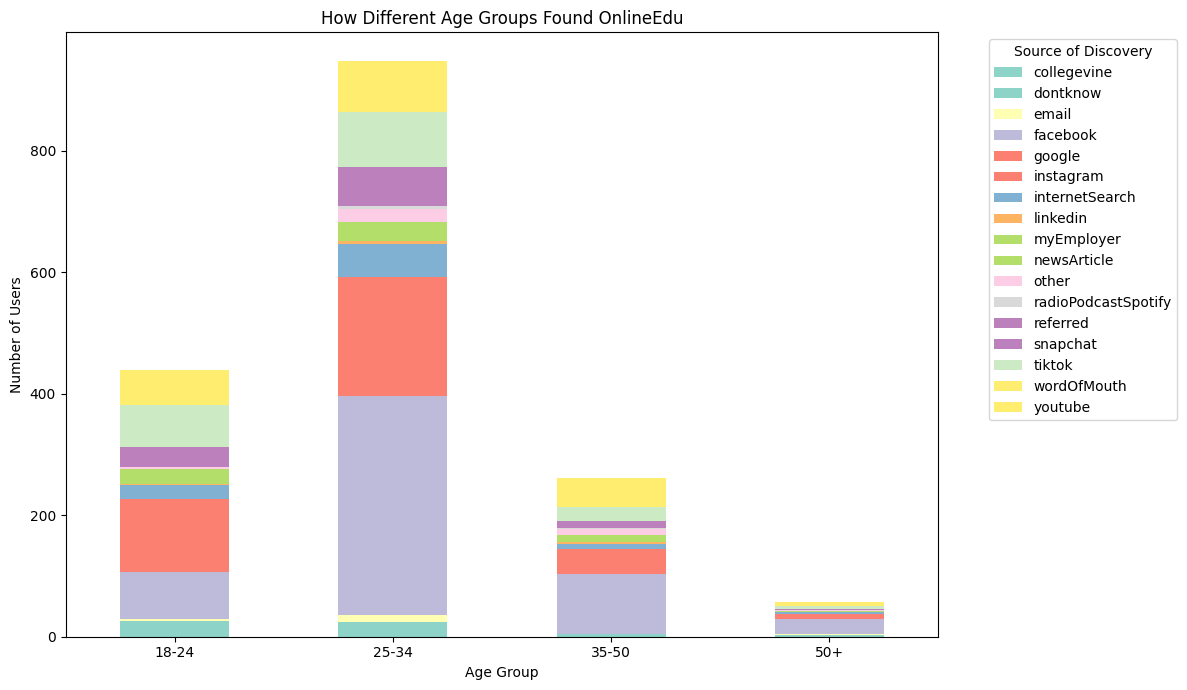

,hear_about_onlineedu,count
0,facebook,561
1,instagram,356
2,tiktok,190
3,youtube,104
4,wordOfMouth,93
5,internetSearch,90
6,snapchat,85
7,myEmployer,58
8,dontknow,57
9,other,37


In [34]:
# Step 1
age_bins = [18, 24, 34, 50, float('inf')]  # Bins for 18-24, 25-34, 35-50, 50+
age_labels = ['18-24', '25-34', '35-50', '50+']  # Labels for each bin

# Step 2
demo_engagement_data['age_group'] = pd.cut(demo_engagement_data['age'], bins=age_bins, labels=age_labels, right=False)

# Step 3
grouped_data = demo_engagement_data.groupby(['age_group', 'hear_about_onlineedu']).size().unstack().fillna(0)

# Step 4
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')

# Step 5
plt.title('How Different Age Groups Found OnlineEdu')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)  # Keeps the x-axis labels straight
plt.legend(title='Source of Discovery', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 6
plt.tight_layout()  # Ensures nothing gets cut off
plt.show()

# Step 7
platform_counts = demo_data['hear_about_onlineedu'].value_counts()
platform_counts = pd.DataFrame(platform_counts).reset_index()
platform_counts